In [2]:
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

# adding seaborn to analyze data

import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200)





import os

In [4]:
file_path = "reclassified.csv"
df = pd.read_csv(file_path)
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff,global_industry
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States,1.0,Healthcare
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India,1.0,Financial
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada,0.0,Industrial
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany,0.0,Energy
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India,1.0,Consumer_Staples


In [6]:
# checking df info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1245 non-null   object 
 1   location             1245 non-null   object 
 2   industry             1245 non-null   object 
 3   total_laid_off       1245 non-null   float64
 4   percentage_laid_off  1245 non-null   float64
 5   date                 1245 non-null   object 
 6   country              1245 non-null   object 
 7   mass_layoff          1245 non-null   float64
 8   global_industry      1245 non-null   object 
dtypes: float64(3), object(6)
memory usage: 87.7+ KB


In [7]:
# change our date dtype to datetime

df['date']= pd.to_datetime(df['date'])
print(df.dtypes)

company                        object
location                       object
industry                       object
total_laid_off                float64
percentage_laid_off           float64
date                   datetime64[ns]
country                        object
mass_layoff                   float64
global_industry                object
dtype: object


In [8]:
# create csv for all our data March 2020 until April 2023

df.to_csv("full_data_set.csv", encoding="utf-8", index = False)

In [9]:
# plotting our features

df['percentage_laid_off'].value_counts()

0.100    114
0.200    106
0.150     71
0.250     71
0.050     62
        ... 
0.125      1
0.115      1
0.570      1
0.650      1
0.980      1
Name: percentage_laid_off, Length: 74, dtype: int64

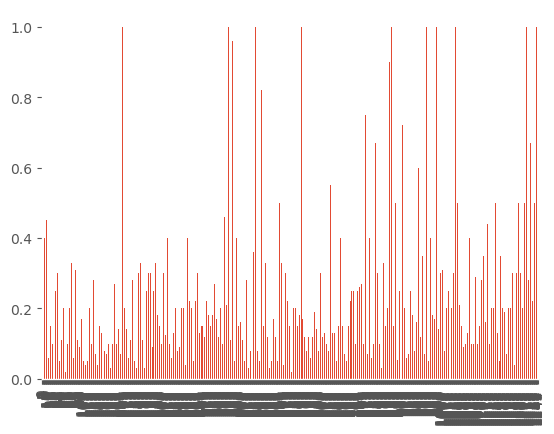

In [10]:
# creating a bar chart

df['percentage_laid_off'].plot(kind='bar')

plt.show()

<AxesSubplot:ylabel='Frequency'>

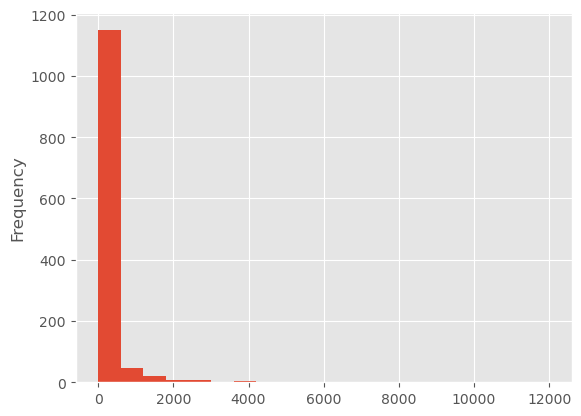

In [11]:
# trying a histogram

df['total_laid_off'].plot(kind='hist', bins=20)

In [12]:
# compare maybe different features

df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff,global_industry
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States,1.0,Healthcare
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India,1.0,Financial
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada,0.0,Industrial
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany,0.0,Energy
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India,1.0,Consumer_Staples


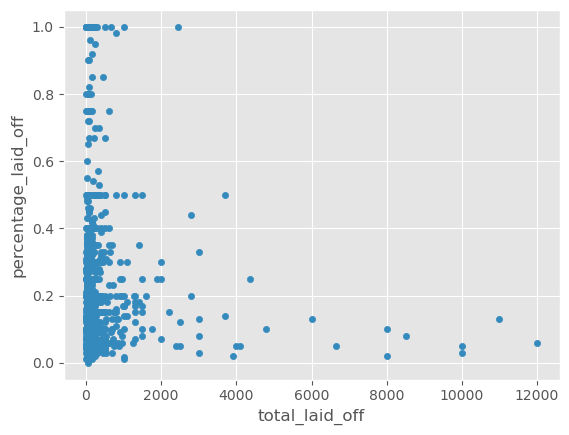

In [13]:
#compare % laid off vs total laid off with scatter plot

df.plot(kind='scatter', x= 'total_laid_off', 
        y= 'percentage_laid_off')
plt.show()

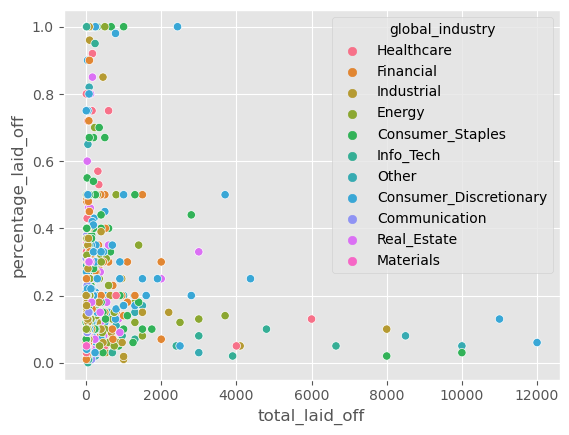

In [14]:
# using sns for a scatterplot that compares our industry, total laid off and percent laid off
sns.scatterplot(x= 'total_laid_off', 
        y= 'percentage_laid_off',
                hue='global_industry',
               data=df)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

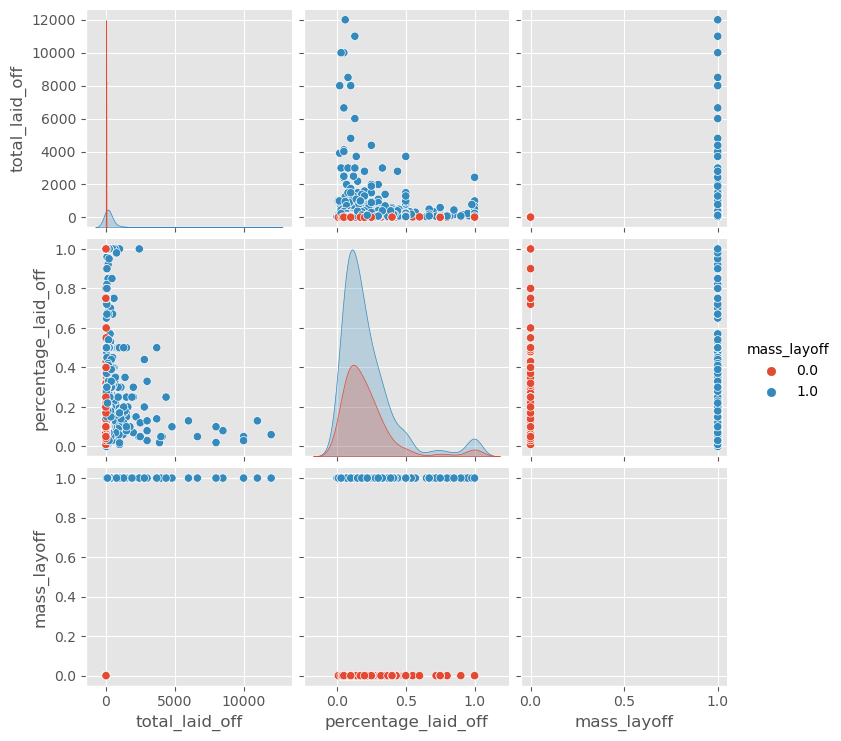

In [15]:
# using pairplot to look at multiple data

sns.pairplot(df, vars= ['total_laid_off', 'percentage_laid_off', 'mass_layoff'],
            hue= 'mass_layoff')
plt.show

In [16]:
# correlation with categories.  creating a df for just this purpose 

df_corr= df[['total_laid_off', 'percentage_laid_off', 'mass_layoff']].corr()

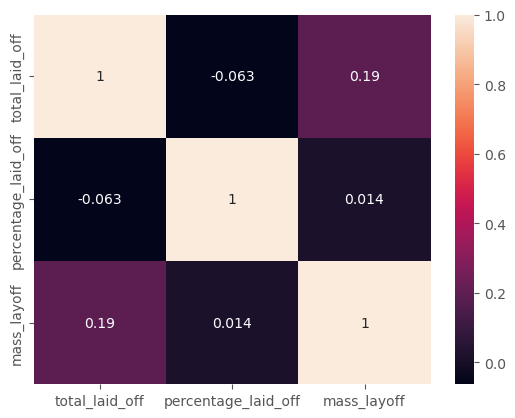

In [17]:
# heatmap
sns.heatmap(df_corr, annot=True)

plt.show()

In [18]:
# break down data in quarters.  start with 1 qtr of 2021 

df_2021_1qtr= df[(df['date']>"2020-12-31")&(df['date']<"2021-04-01")]

df_2021_1qtr.head(7)

# we only have 7 companies with layoffs during first qtr of 2021

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff,global_industry
876,Bounce,Bengaluru,Transportation,200.0,0.40,2021-02-22,India,1.0,Energy
877,Limelight,New York City,Recruiting,13.0,1.00,2021-02-04,United States,0.0,Industrial
878,Quandoo,Berlin,Food,87.0,0.20,2021-02-03,Germany,1.0,Consumer_Staples
879,Hubba,Toronto,Retail,45.0,1.00,2021-02-01,Canada,0.0,Consumer_Staples
880,Postmates,SF Bay Area,Food,180.0,0.15,2021-01-23,United States,1.0,Consumer_Staples
881,Pocketmath,Singapore,Marketing,21.0,1.00,2021-01-20,Singapore,0.0,Industrial
882,Dropbox,SF Bay Area,Other,315.0,0.15,2021-01-13,United States,1.0,Other


In [19]:
# count our data set

df_2021_1qtr.count()

company                7
location               7
industry               7
total_laid_off         7
percentage_laid_off    7
date                   7
country                7
mass_layoff            7
global_industry        7
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

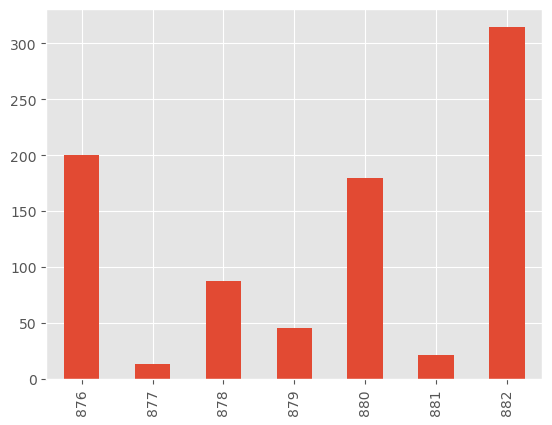

In [20]:
# creating a bar chart 2021 1qtr

df_2021_1qtr['total_laid_off'].plot(kind='bar', )

plt.show

<AxesSubplot:ylabel='Frequency'>

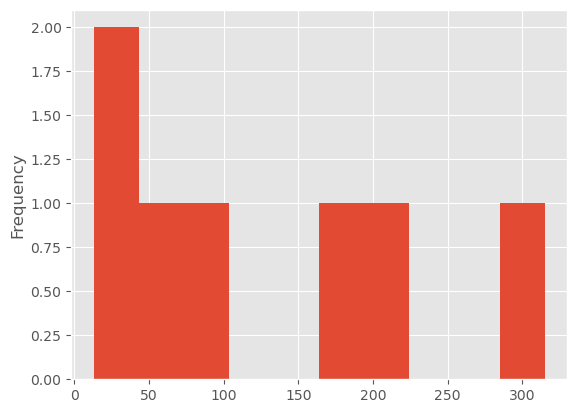

In [21]:
# trying a histogram

df_2021_1qtr['total_laid_off'].plot(kind='hist', bins=10)

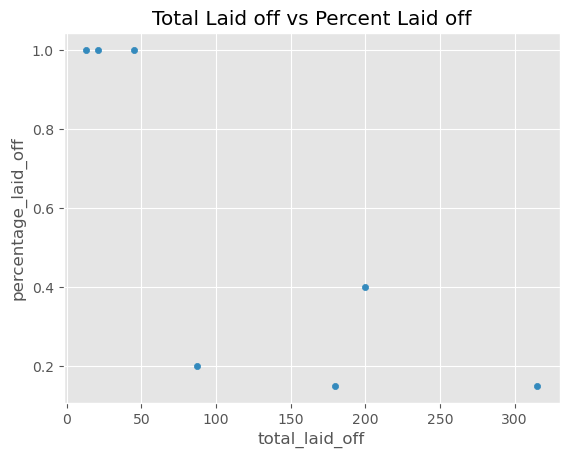

In [22]:
#compare % laid off vs total laid off with scatter plot

df_2021_1qtr.plot(kind='scatter', 
                  x= 'total_laid_off', 
                  y= 'percentage_laid_off',
                 title= 'Total Laid off vs Percent Laid off')
plt.show()

# the three companies that were 100% layoffs didn't have over 50 employees to be considered a mass layoff

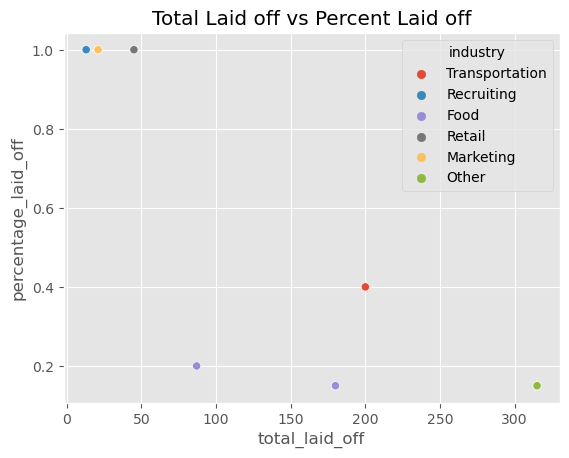

In [23]:
# using sns for a scatterplot that compares our industry, total laid off and percent laid off
ax= sns.scatterplot(x= 'total_laid_off', 
        y= 'percentage_laid_off',
                hue='industry',
               data=df_2021_1qtr)

ax.set_title('Total Laid off vs Percent Laid off')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

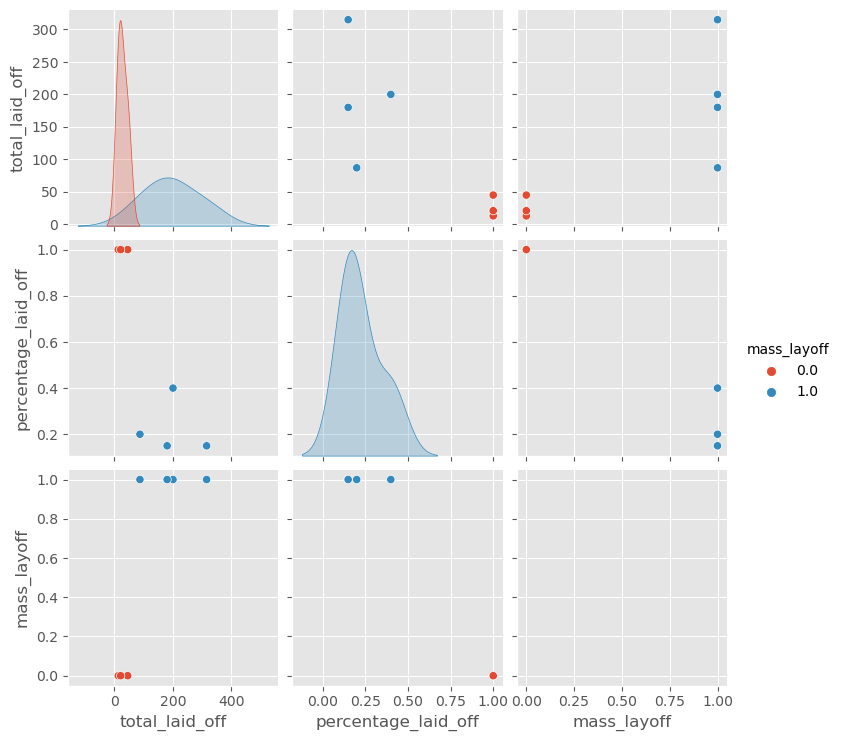

In [24]:
# using pairplot to look at multiple data

sns.pairplot(df_2021_1qtr, vars= ['total_laid_off', 'percentage_laid_off', 'mass_layoff'],
            hue= 'mass_layoff')
plt.show

In [25]:
# correlation with categories.  creating a df for just this purpose 

df_2021_1qtr[['total_laid_off', 'percentage_laid_off', 'mass_layoff']].corr()

,total_laid_off,percentage_laid_off,mass_layoff
total_laid_off,1.000000,-0.802802,0.803824
percentage_laid_off,-0.802802,1.000000,-0.979979
mass_layoff,0.803824,-0.979979,1.000000


In [26]:
# create 2021 1st qtr CSV

df_2021_1qtr.to_csv("2021_1st_qtr.csv", encoding="utf-8", index = False)

In [27]:
# create 2022 1st qtr

df_2022_1qtr= df[(df['date']>"2021-12-31")&(df['date']<"2022-04-01")]

df_2022_1qtr.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff,global_industry
851,Rasa,Berlin,Data,59.0,0.40,2022-03-30,Germany,1.0,Info_Tech
852,Gopuff,Philadelphia,Food,450.0,0.03,2022-03-29,United States,1.0,Consumer_Staples
853,Thinkific,Vancouver,Education,100.0,0.20,2022-03-29,Canada,1.0,Consumer_Discretionary
854,Storytel,Stockholm,Media,100.0,0.10,2022-03-17,Sweden,1.0,Communication
855,Trell,Bengaluru,Retail,300.0,0.50,2022-03-15,India,1.0,Consumer_Staples


In [28]:
# count our items

df_2022_1qtr.count()

company                18
location               18
industry               18
total_laid_off         18
percentage_laid_off    18
date                   18
country                18
mass_layoff            18
global_industry        18
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

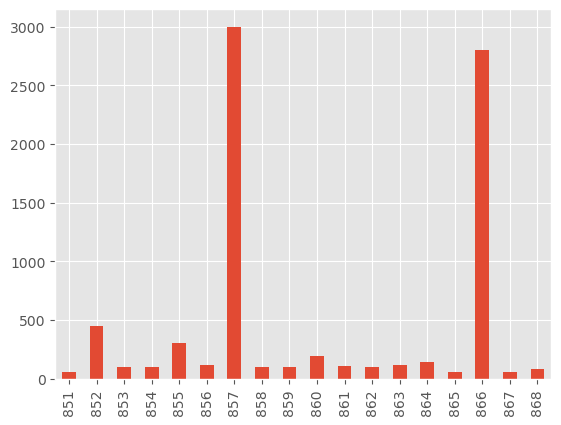

In [29]:
# creating a bar chart 2022 1qtr

df_2022_1qtr['total_laid_off'].plot(kind='bar', )

plt.show

<AxesSubplot:ylabel='Frequency'>

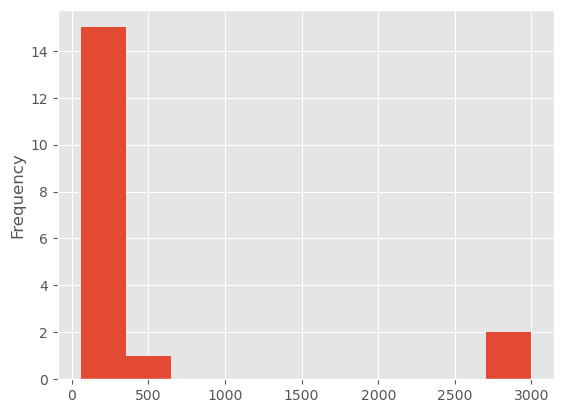

In [30]:
# histogram for 2022 1st qtr

df_2022_1qtr['total_laid_off'].plot(kind='hist', bins=10)

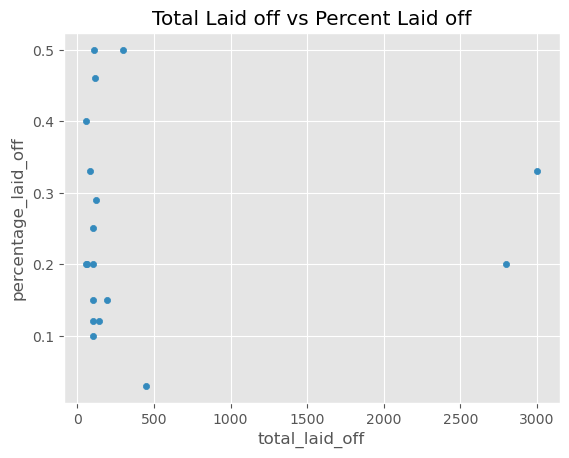

In [31]:
#compare % laid off vs total laid off with scatter plot

df_2022_1qtr.plot(kind='scatter', 
                  x= 'total_laid_off', 
                  y= 'percentage_laid_off',
                 title= 'Total Laid off vs Percent Laid off')
plt.show()

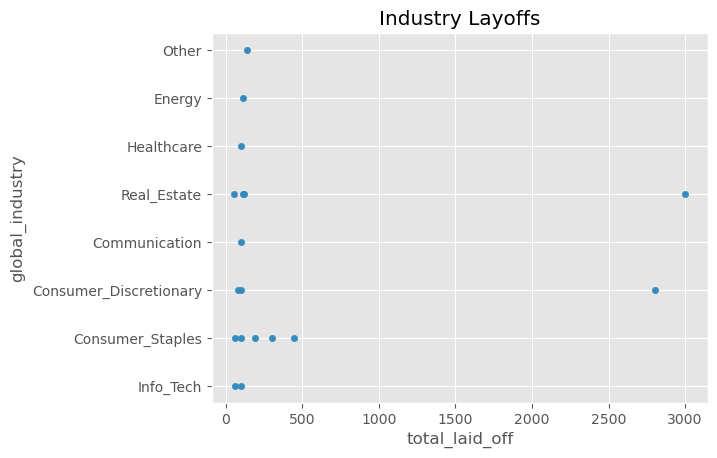

In [33]:
# compare by industry and total laid off

df_2022_1qtr.plot(kind='scatter', 
                  x= 'total_laid_off', 
                  y= 'global_industry',
                 title= 'Industry Layoffs')
plt.show()

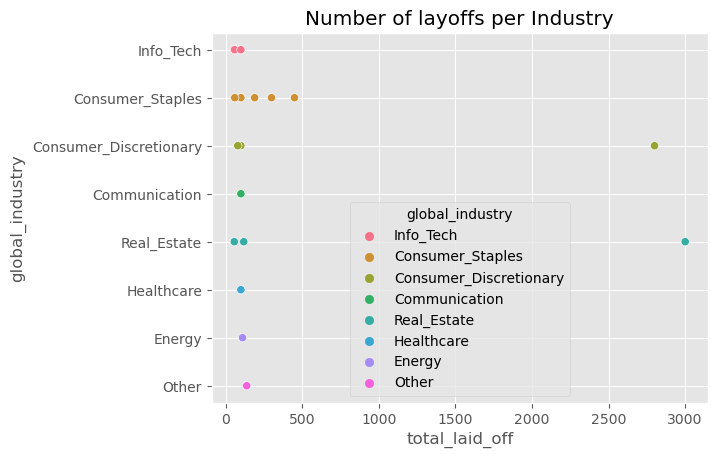

In [34]:
# using sns for a scatterplot that compares our industry, total laid off and percent laid off
ax= sns.scatterplot(x= 'total_laid_off', 
        y= 'global_industry',
                hue='global_industry',
               data=df_2022_1qtr)

ax.set_title('Number of layoffs per Industry')

plt.show()

In [35]:
# checking out 18 companies

df_2022_1qtr.head(18)
# every single layoff we have qualifies for a mass layoff.

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff,global_industry
851,Rasa,Berlin,Data,59.0,0.40,2022-03-30,Germany,1.0,Info_Tech
852,Gopuff,Philadelphia,Food,450.0,0.03,2022-03-29,United States,1.0,Consumer_Staples
853,Thinkific,Vancouver,Education,100.0,0.20,2022-03-29,Canada,1.0,Consumer_Discretionary
854,Storytel,Stockholm,Media,100.0,0.10,2022-03-17,Sweden,1.0,Communication
855,Trell,Bengaluru,Retail,300.0,0.50,2022-03-15,India,1.0,Consumer_Staples
856,Knock,New York City,Real Estate,115.0,0.46,2022-03-15,United States,1.0,Real_Estate
857,Better.com,New York City,Real Estate,3000.0,0.33,2022-03-08,United States,1.0,Real_Estate
858,Adaptive Biotechnologies,Seattle,Healthcare,100.0,0.12,2022-03-08,United States,1.0,Healthcare
859,Hyperscience,New York City,Data,100.0,0.25,2022-03-03,United States,1.0,Info_Tech
860,Wish,SF Bay Area,Retail,190.0,0.15,2022-03-01,United States,1.0,Consumer_Staples


<function matplotlib.pyplot.show(close=None, block=None)>

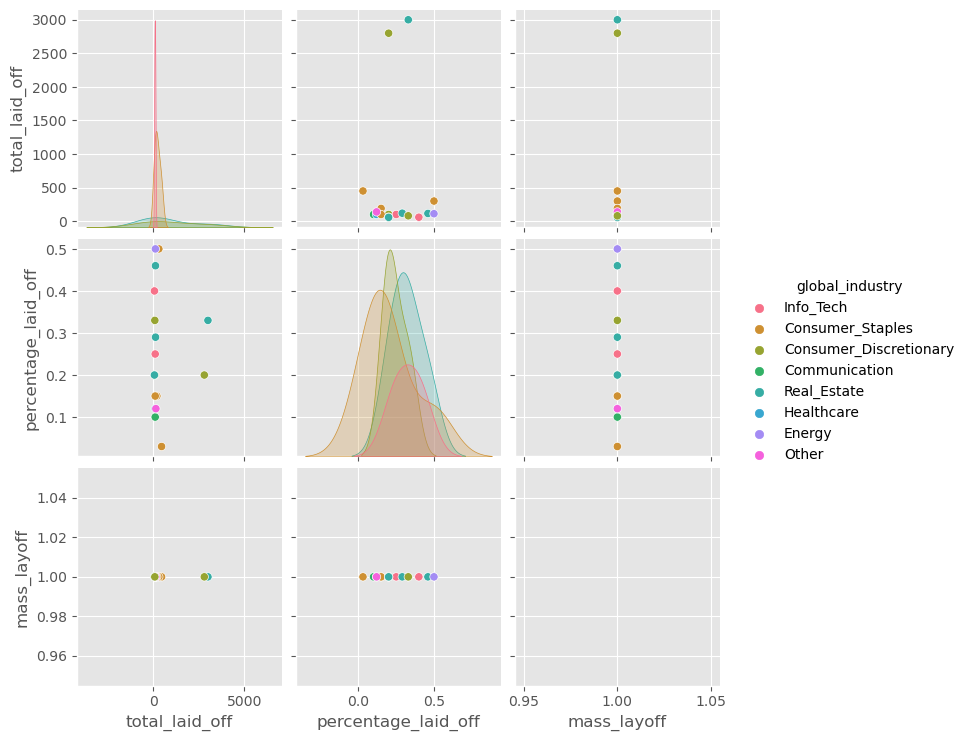

In [37]:
# using pairplot to look at multiple data sets for 2022 1st qtr

sns.pairplot(df_2022_1qtr, vars= ['total_laid_off', 'percentage_laid_off', 'mass_layoff'],
            hue= 'global_industry')
plt.show

In [38]:
# correlation with categories.

df_2022_1qtr[['total_laid_off', 'percentage_laid_off', 'mass_layoff']].corr()

,total_laid_off,percentage_laid_off,mass_layoff
total_laid_off,1.000000,0.022552,NaN
percentage_laid_off,0.022552,1.000000,NaN
mass_layoff,NaN,NaN,NaN


In [39]:
# create 2022 1st qtr CSV

df_2022_1qtr.to_csv("2022_1st_qtr.csv", encoding="utf-8", index = False)

In [40]:
# creating 2021 4th quarter 

df_2021_4qtr= df[(df['date']>"2021-09-30")&(df['date']<"2022-01-01")]

df_2021_4qtr.head()

# no other graphs to do here, we only have 3 companies with layoffs, all mass.

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff,global_industry
869,Better.com,New York City,Real Estate,900.0,0.09,2021-12-01,United States,1.0,Real_Estate
870,BitTitan,Seattle,Data,70.0,0.27,2021-11-18,United States,1.0,Info_Tech
871,Zillow,Seattle,Real Estate,2000.0,0.25,2021-11-02,United States,1.0,Real_Estate


In [41]:
# create 2021 4th qtr CSV

df_2021_4qtr.to_csv("2021_4qtr.csv", encoding="utf-8", index = False)

In [42]:
# create 2022 4th quarter data

df_2022_4qtr= df[(df['date']>"2022-09-30")&(df['date']<"2023-01-01")]

df_2022_4qtr.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff,global_industry
259,PayU,Amsterdam,Finance,150.0,0.06,2022-12-26,Netherlands,1.0,Financial
260,Willow,Sydney,Real Estate,99.0,0.22,2022-12-23,Australia,1.0,Real_Estate
261,Back Market,Paris,Retail,93.0,0.13,2022-12-23,France,1.0,Consumer_Staples
262,TuSimple,San Diego,Transportation,350.0,0.25,2022-12-21,United States,1.0,Energy
263,Chope,Singapore,Food,65.0,0.24,2022-12-20,Singapore,1.0,Consumer_Staples


In [43]:
# counting data for 2022 4th qtr

df_2022_4qtr.count()

company                230
location               230
industry               230
total_laid_off         230
percentage_laid_off    230
date                   230
country                230
mass_layoff            230
global_industry        230
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

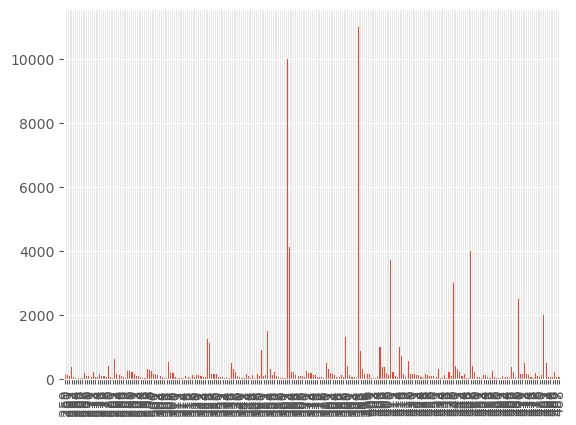

In [46]:
# creating a bar chart 2022 4qtr

df_2022_4qtr['total_laid_off'].plot(kind='bar', )

plt.show

# we have more data than in other 3 qtrs for sure

<AxesSubplot:ylabel='Frequency'>

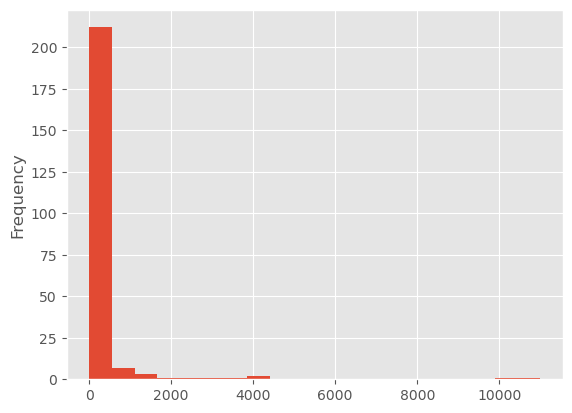

In [47]:
# histogram for 2022 1st qtr

df_2022_4qtr['total_laid_off'].plot(kind='hist', bins=20)

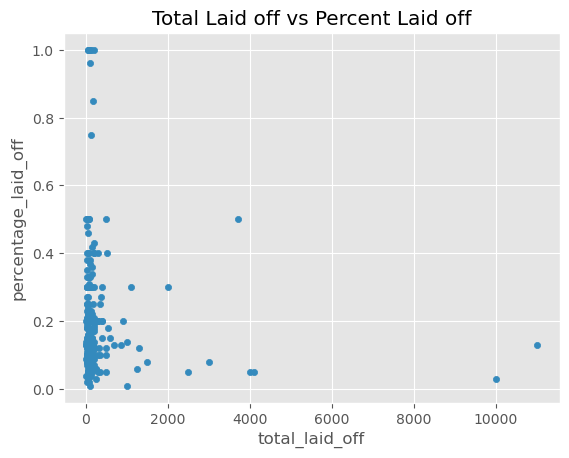

In [48]:
#compare % laid off vs total laid off with scatter plot

df_2022_4qtr.plot(kind='scatter', 
                  x= 'total_laid_off', 
                  y= 'percentage_laid_off',
                 title= 'Total Laid off vs Percent Laid off')
plt.show()

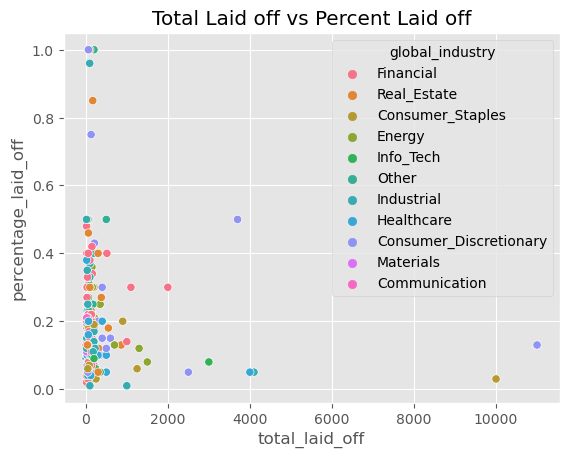

In [50]:
# using sns for a scatterplot that compares our industry, total laid off and percent laid off
ax= sns.scatterplot(x= 'total_laid_off', 
        y= 'percentage_laid_off',
                hue='global_industry',
               data=df_2022_4qtr)

ax.set_title('Total Laid off vs Percent Laid off')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

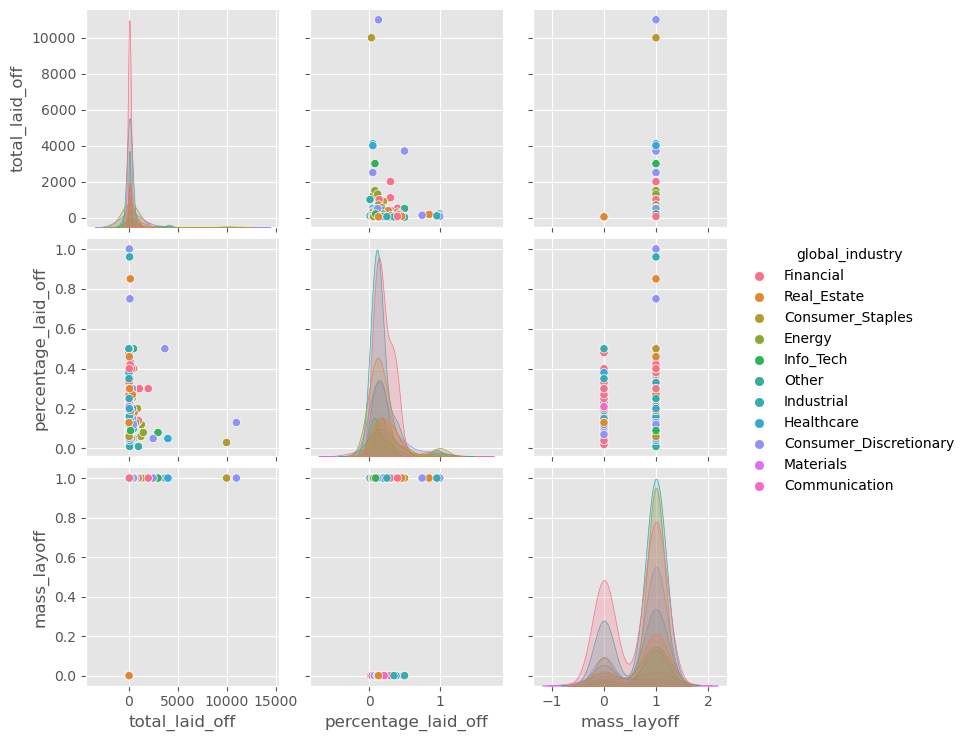

In [51]:
# using pairplot to look at multiple data sets for 2022 4th qtr

sns.pairplot(df_2022_4qtr, vars= ['total_laid_off', 'percentage_laid_off', 'mass_layoff'],
            hue= 'global_industry')
plt.show

In [52]:
# correlation with categories.

df_2022_4qtr[['total_laid_off', 'percentage_laid_off', 'mass_layoff']].corr()

,total_laid_off,percentage_laid_off,mass_layoff
total_laid_off,1.000000,-0.081534,0.155095
percentage_laid_off,-0.081534,1.000000,0.049586
mass_layoff,0.155095,0.049586,1.000000


In [53]:
# create 2022 4th qtr CSV

df_2022_4qtr.to_csv("2022_4th_qtr.csv", encoding="utf-8", index = False)